In [1]:
!pip install pandas matplotlib numpy nltk seaborn sklearn gensim pyldavis wordcloud textblob spacy textstat

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 63.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 86.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 57.6 MB/s eta 0:00

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

# load and basic exploration

In [5]:
df= pd.read_excel('/content/final_database_of_papers.xlsx',index_col=0)

In [6]:
df.head(10)

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi,keyword_display
0,Fauna bio,36420970,Microvesicle release from inner segments of he...,"['Microvesicle', 'Mitochondria', 'Photorecepto...",2022-11-25,Many inherited visual diseases arise from muta...,Disease models & mechanisms,10.1242/dmm.049871,"Microvesicle, Mitochondria, Photoreceptor, Ret..."
1,Fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"['Microvesicle', 'Mitochondria', 'Photorecepto...",2022-04-29,Behavioral genetics in dogs has focused on mod...,"Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...,"Microvesicle, Mitochondria, Photoreceptor, Ret..."
2,Fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"['ARE binding proteins', 'AU-rich element (ARE...",2021-02-05,Hibernation is a physiological and behavioral ...,Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...,"ARE binding proteins, AU-rich element (ARE), I..."
3,Fauna bio,32734172,Veterinary informatics: forging the future bet...,"['informatics', 'medicine', 'one health', 'tra...",2020-08-01,This manuscript reviews the current state of v...,JAMIA open,10.1093/jamiaopen/ooaa005,"informatics, medicine, one health, translation..."
4,Fauna bio,32569327,FasTag: Automatic text classification of unstr...,"['informatics', 'medicine', 'one health', 'tra...",2020-06-23,Unstructured clinical narratives are continuou...,PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...,"informatics, medicine, one health, translation..."
5,Fauna bio,31886416,Genetic variation drives seasonal onset of hib...,"['Computational biology and bioinformatics', '...",2019-12-31,Hibernation in sciurid rodents is a dynamic ph...,Communications biology,10.1038/s42003-019-0719-5\n10.1101/115717,"Computational biology and bioinformatics, Gene..."
6,Fountain therapeutics,35971662,Molecular and histological correlates of cogni...,"['T lymphocytes', 'aging', 'behavior', 'blood-...",2022-08-17,Increasing age is the number one risk factor f...,Brain and behavior,10.1002/brb3.2736\n10.18632/aging.102242\n10.1...,"T lymphocytes, aging, behavior, blood-brain ba..."
7,Fountain therapeutics,35110572,Systematic comparative analysis of strand-spec...,"['T lymphocytes', 'aging', 'behavior', 'blood-...",2022-02-04,Despite the recent precipitous decline in the ...,Scientific reports,10.1038/s41598-021-04583-z\n10.1038/nmeth.2483...,"T lymphocytes, aging, behavior, blood-brain ba..."
8,Fountain therapeutics,31996332,Human textiles: A cell-synthesized yarn as a t...,"['Biomaterials', 'Extracellular matrix', 'Huma...",2020-01-31,"In the field of tissue engineering, many group...",Acta biomaterialia,10.1016/j.actbio.2020.01.037,"Biomaterials, Extracellular matrix, Human cell..."
9,Intraclear biologics,36564175,SARS-CoV-2 omicron breakthrough infections in ...,"['COVID-19', 'MULTIPLE SCLEROSIS']",2022-12-24,It is unclear which patients with multiple scl...,"Journal of neurology, neurosurgery, and psychi...",10.1136/jnnp-2022-330100,"COVID-19, MULTIPLE SCLEROSIS"


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company_name      3140 non-null   object        
 1   article_id        3140 non-null   int64         
 2   title             3140 non-null   object        
 3   keywords          3140 non-null   object        
 4   publication_date  3140 non-null   datetime64[ns]
 5   abstract          3140 non-null   object        
 6   journal           3140 non-null   object        
 7   doi               3135 non-null   object        
 8   keyword_display   3140 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 245.3+ KB


In [7]:
df_interest = df[['title','publication_date']]

In [8]:
df_interest

,title,publication_date
0,Microvesicle release from inner segments of he...,2022-11-25
1,Ancestry-inclusive dog genomics challenges pop...,2022-04-29
2,Dynamic RNA Regulation in the Brain Underlies ...,2021-02-05
3,Veterinary informatics: forging the future bet...,2020-08-01
4,FasTag: Automatic text classification of unstr...,2020-06-23
...,...,...
3135,Evaluation of neurotrophic factor secreting me...,2022-09-17
3136,A randomized placebo-controlled phase 3 study ...,2021-12-11
3137,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,2021-01-21
3138,Addressing heterogeneity in amyotrophic latera...,2020-01-04


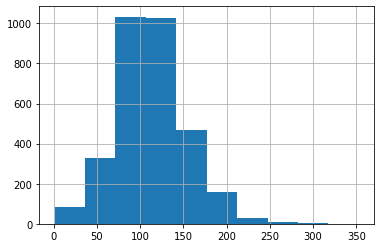

In [9]:
df_interest['title'].str.len().hist()

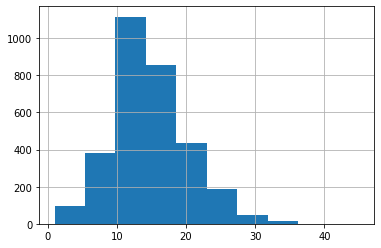

In [10]:
text = df_interest['title']
text.str.split().map(lambda x: len(x)).hist()

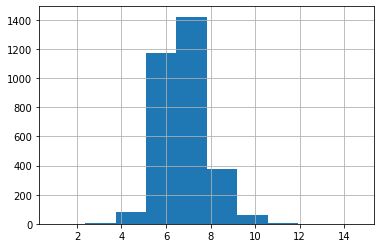

In [11]:
df_interest['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [12]:
corpus=[]
new= df_interest['title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

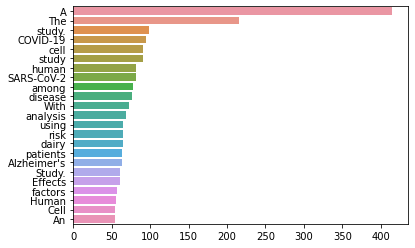

In [13]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

# n gram analysis

In [14]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [16]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import export_graphviz

In [17]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

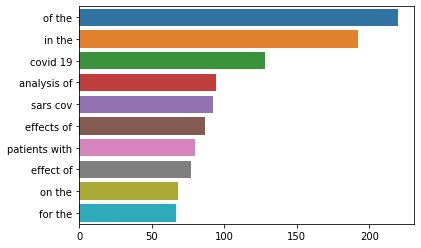

In [29]:
top_bi_grams=get_top_ngram(text,n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x)

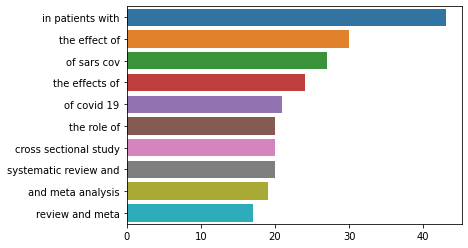

In [18]:
top_tri_grams=get_top_ngram(text,n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

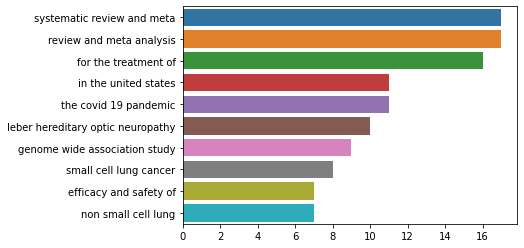

In [30]:
top_quad_grams=get_top_ngram(text,n=4)
x,y=map(list,zip(*top_quad_grams))
sns.barplot(x=y,y=x)

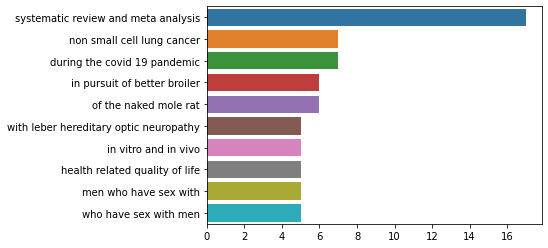

In [20]:
top_five_grams=get_top_ngram(text,n=5)
x,y=map(list,zip(*top_five_grams))
sns.barplot(x=y,y=x)

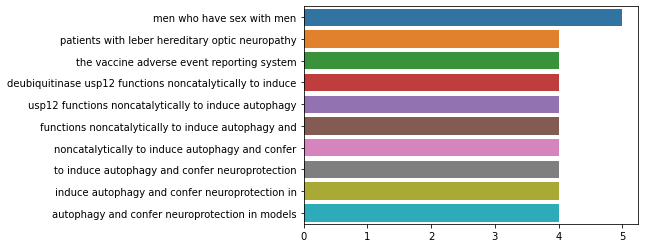

In [22]:
top_six_grams=get_top_ngram(text,n=6)
x,y=map(list,zip(*top_six_grams))
sns.barplot(x=y,y=x)

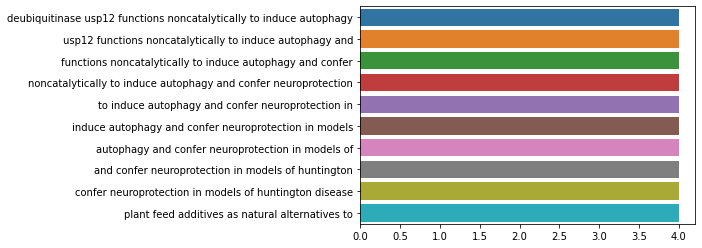

In [26]:
top_seven_grams=get_top_ngram(text,n=7)
x,y=map(list,zip(*top_seven_grams))
sns.barplot(x=y,y=x)

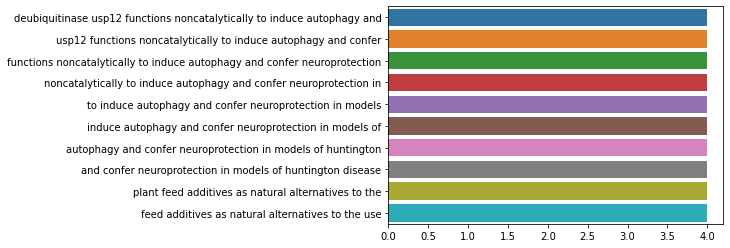

In [28]:
top_eight_grams=get_top_ngram(text,n=8)
x,y=map(list,zip(*top_eight_grams))
sns.barplot(x=y,y=x)

# as you can see after N-gram (N)=8 the frequency (f) is concurrent 
## fixed integer of f=4 , N=1 -> N=8 was our experiment size 

# topic modeling with LDA

In [33]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for word in text:
        words=[w for w in word_tokenize(word) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_text(text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [35]:
%pip install gensim
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.005*"cell" + 0.004*"study" + 0.004*"The" + 0.003*"Disease" + 0.003*"acid" + 0.003*"response" + 0.003*"SARS-CoV-2" + 0.003*"gene" + 0.003*"Cancer" + 0.002*"patient"'),
 (1,
  '0.005*"The" + 0.005*"study" + 0.004*"dairy" + 0.004*"China" + 0.003*"Study" + 0.003*"effect" + 0.003*"With" + 0.003*"among" + 0.003*"trait" + 0.002*"milk"'),
 (2,
  '0.007*"disease" + 0.007*"study" + 0.006*"The" + 0.005*"cell" + 0.004*"patient" + 0.003*"risk" + 0.003*"Study" + 0.003*"factor" + 0.003*"analysis" + 0.003*"trial"'),
 (3,
  '0.006*"COVID-19" + 0.004*"cell" + 0.004*"human" + 0.004*"The" + 0.004*"disease" + 0.003*"Development" + 0.003*"antibody" + 0.003*"factor" + 0.003*"system" + 0.003*"SARS-CoV-2"')]

On the left side, the area of each circle represents the importance of the topic relative to the corpus. As there are four topics, we have four circles.
The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 3 and topic 4 overlap, this indicates that the topics are more similar.
On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 1 the most relevant words are police, new, may, war, etc

In [47]:
import pyLDAvis
import pyLDAvis.gensim_models
#import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.093566 -0.060710       1        1  26.495861
0     -0.027128  0.060973       2        1  26.094845
1     -0.090177 -0.064439       3        1  24.831191
3      0.023740  0.064176       4        1  22.578103, topic_info=           Term        Freq       Total Category  logprob  loglift
2292      dairy   49.000000   49.000000  Default  30.0000  30.0000
295        acid   39.000000   39.000000  Default  29.0000  29.0000
3793      trait   26.000000   26.000000  Default  28.0000  28.0000
284       phase   23.000000   23.000000  Default  27.0000  27.0000
460     disease  123.000000  123.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
702       study   16.434790  160.124217   Topic4  -6.1443  -0.7884
107     Disease   11.576450   68.094170   Topic4  -6.4947  -0.2837
367       among   10.889821   58.803772   Topic4  -6.5559  -0.1982
277       Study   10.992358   82.090532   Topic4  -6.5465  -0.5224
1918  Alzheimer   10.360130   53.765754   Topic4  -6.6057  -0.1585

[333 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3631      3  0.806922      2017
1326      3  0.807362  Addition
1153      3  0.960841   Adipose
357       1  0.306472    Adults
357       2  0.122589    Adults
...     ...       ...       ...
2979      2  0.829709    visual
6248      3  0.807036     water
6445      2  0.885256      week
2327      3  0.195713     white
2327      4  0.782850     white

[584 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

# wordcloud

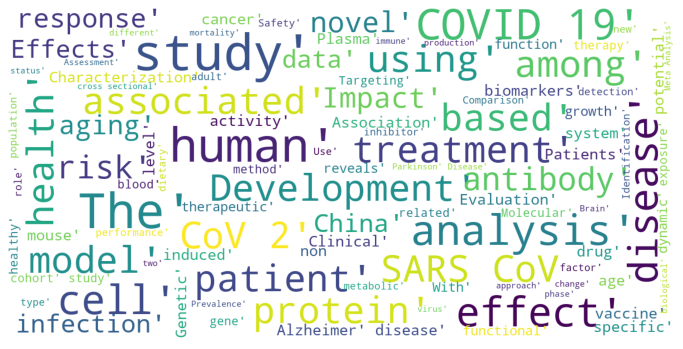

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

<ipython-input-52-20709802e448>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['polarity_score']=text.apply(lambda x : polarity(x))


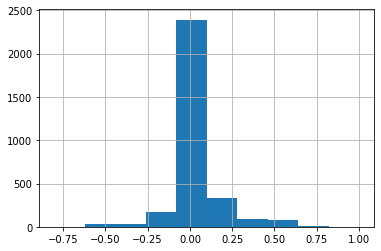

In [52]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_interest['polarity_score']=text.apply(lambda x : polarity(x))
df_interest['polarity_score'].hist()

## You can see that the polarity mainly ranges between -0.25 to and 0.25. This indicates that the majority of the abstract text titles are neutral.

<ipython-input-53-92666bccc8ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['polarity']=df_interest['polarity_score'].map(lambda x: sentiment(x))


<BarContainer object of 3 artists>

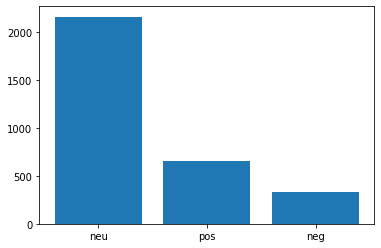

In [53]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df_interest['polarity']=df_interest['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df_interest.polarity.value_counts().index,
        df_interest.polarity.value_counts())

In [54]:
df_interest[df_interest['polarity']=='pos']['title'].head()

0     Microvesicle release from inner segments of he...
1     Ancestry-inclusive dog genomics challenges pop...
10    ASCENIV utilization in a primary immunodeficie...
12    Epidemiology of Type 3 Poliovirus AFP Cases in...
16    Future Newborns with Opioid-Induced Neonatal A...
Name: title, dtype: object

In [55]:
df_interest[df_interest['polarity']=='neg']['title'].head()

8     Human textiles: A cell-synthesized yarn as a t...
21    Antibodies targeting the neuraminidase active ...
35    Antibody persistence and safety after heterolo...
70    Assessing Antigen-Adjuvant Complex Stability A...
83    Development and characterization of secondary ...
Name: title, dtype: object

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-56-9667f8c93853>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['polarity']=df_interest['title'].map(lambda x: get_vader_score(x))


<BarContainer object of 3 artists>

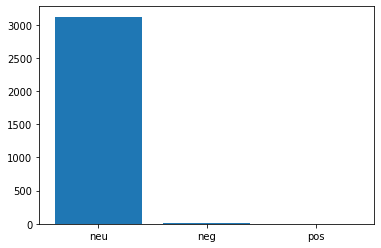

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

df_interest['polarity']=df_interest['title'].map(lambda x: get_vader_score(x))
polarity=df_interest['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

In [57]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-01 23:23:14.308932: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [58]:
import spacy

nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [61]:
from spacy import displacy
doc = nlp(df['abstract'][0])
displacy.render(doc, style='ent',  jupyter=True, options={'distance': 90})

In [70]:
!pip install scispacy - q
!pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_scibert-0.5.1.tar.gz'

ERROR: Invalid requirement: '-'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.6/417.6 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.6 MB/s eta 0:00:00
  Created wheel for en-core-sci-scibert: filename=en_core_sci_scibert-0.5.1-py3-none-any.whl size=417647713 sha256=e1f5034f8645d6ad0e792eaac7d458b87af9a525280bfcfd78f12f1e6b40185c
  Stored in directory: /root/.cache/pip/wheels/6c/7a/02/9d611fbc2ee94aa94c84e7bbeb805f59d27d8ccb9d2016564d
Successfully built en-core-sci-scibert


In [76]:
!python -m spacy download en_core_web_trf -q
!pip install 'spacy[transformers]'


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-01 23:37:08.860733: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 3.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
!pip install spacy-transformers -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [79]:
!pip install spacy-transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:

nlp = spacy.load("en_core_sci_scibert")

ValueError: ignored

In [85]:
! pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_md-0.5.1.tar.gz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.5.1-py3-none-any.whl size=120253165 sha256=6ef3cee66f9c61bf8323137e50a5c98cc47337bbe8bee3480301eabae42a6748
  Stored in directory: /root/.cache/pip/wheels/cd/2d/59/43791dba56f306a2eaa9b510a42699a61e992344837bd25b3f
Successfully built en-core-sci-md


In [86]:
#https://allenai.github.io/scispacy/
nlp = spacy.load("en_core_sci_md")

In [89]:
doc = nlp(df['abstract'][3])
displacy.render(doc, style='ent',  jupyter=True)

In [1]:
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

ModuleNotFoundError: ignored

In [92]:
print(list(doc.sents))

[This manuscript reviews the current state of veterinary medical electronic health records and the ability to aggregate and analyze large datasets from multiple organizations and clinics., We also review analytical techniques as well as research efforts into veterinary informatics with a focus on applications relevant to human and animal medicine., Our goal is to provide references and context for these resources so that researchers can identify resources of interest and translational opportunities to advance the field., This review covers various methods of veterinary informatics including natural language processing and machine learning techniques in brief and various ongoing and future projects., After detailing techniques and sources of data, we describe some of the challenges and opportunities within veterinary informatics as well as providing reviews of common One Health techniques and specific applications that affect both humans and animals., Current limitations in the field of

In [93]:
print(doc.ents)

(manuscript reviews, veterinary medical, electronic health records, aggregate, datasets, multiple, organizations, clinics, review, analytical techniques, research, veterinary, informatics, human, animal medicine, goal, references, context, resources, researchers, resources, translational, opportunities, field, review, methods, veterinary informatics, natural, processing, machine learning techniques, ongoing, projects, techniques, sources, data, challenges, opportunities, veterinary informatics, reviews, Health techniques, applications, humans, animals, limitations, field, veterinary informatics, sources, training, data, machine learning, artificial intelligence algorithms, siloed data, academic institutions, corporate institutions, private practices, inconsistent, data formats, integration, problems, limitations, advancements, field, years, development, data resources, clinicians, researchers, cases, applications, current, potential, veterinary informatics, Veterinary informatics, poss

In [94]:
displacy.render(next(doc.sents), style='dep', jupyter=True)

In [97]:
abbreviation_pipe = AbbreviationDetector(nlp)

#Print the Abbreviation and it's definition
print("Abbreviation", "\t", "Definition")
for abrv in doc._.abbreviations:
      print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form}")

Abbreviation 	 Definition


In [2]:
linker = UmlsEntityLinker(resolve_abbreviations=True)

nlp.add_pipe(linker)
# Each entity is linked to UMLS with a score
# (currently just char-3gram matching).
for umls_ent in entity._.umls_ents:
          print(linker.umls.cui_to_entity[umls_ent[0]])


NameError: ignored